<a href="https://colab.research.google.com/github/Ganeshkumar-p/Personalized-Treatment-Recommendations/blob/main/Personalized_Treatment_Recommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data = pd.read_csv('/content/medical data.csv')

In [3]:
print(data.columns)

Index(['Name', 'DateOfBirth', 'Gender', 'Symptoms', 'Causes', 'Disease',
       'Medicine'],
      dtype='object')


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         241 non-null    object
 1   DateOfBirth  241 non-null    object
 2   Gender       242 non-null    object
 3   Symptoms     247 non-null    object
 4   Causes       245 non-null    object
 5   Disease      249 non-null    object
 6   Medicine     242 non-null    object
dtypes: object(7)
memory usage: 15.8+ KB


In [5]:
data.isnull().sum()

,0
Name,46
DateOfBirth,46
Gender,45
Symptoms,40
Causes,42
Disease,38
Medicine,45


In [22]:
missing_values = data.isnull().sum()


print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [23]:

data['DateOfBirth'] = pd.to_datetime(data['DateOfBirth'], errors='coerce')

# Calculate median excluding NaT values (Not a time)
median_date = data['DateOfBirth'].dropna().median()

# Fill missing values with the median date
data['DateOfBirth'].fillna(median_date, inplace=True)

# Categorical Columns (Gender, Symptoms, Causes, Disease, Medicine):I impute missing values with the mode (most frequent value).
categorical_columns = ['Gender', 'Symptoms', 'Causes', 'Disease', 'Medicine']
for column in categorical_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

<ipython-input-23-7ff7ec4bc689>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['DateOfBirth'].fillna(median_date, inplace=True)
<ipython-input-23-7ff7ec4bc689>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [24]:

missing_values = data.isnull().sum()


print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [9]:
data['Name'].fillna('Unknown', inplace=True)

<ipython-input-9-9ea9c0de8b85>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Name'].fillna('Unknown', inplace=True)


In [10]:
data.isnull().sum()

,0
Name,0
DateOfBirth,0
Gender,0
Symptoms,0
Causes,0
Disease,0
Medicine,0


In [25]:
missing_values = data.isnull().sum()


print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

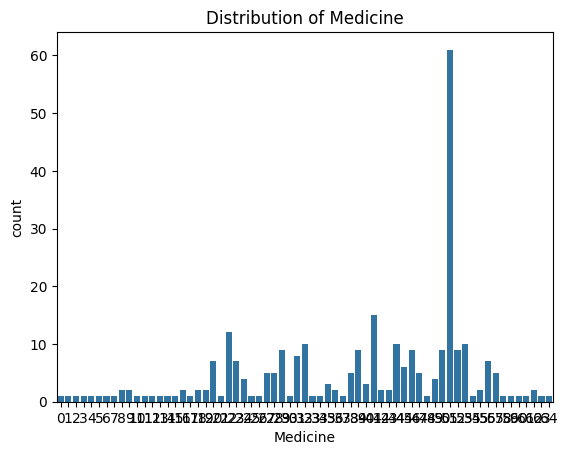

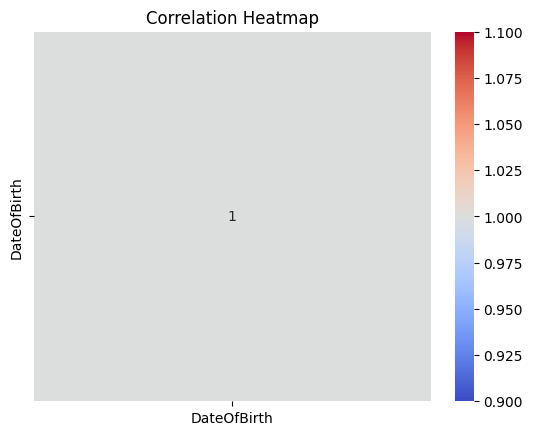

In [27]:
sns.countplot(data=data, x='Medicine')
plt.title('Distribution of Medicine')
plt.show()


numeric_columns = ['DateOfBirth']
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = encoder.fit_transform(data[column])

In [15]:
X = data.drop('Medicine', axis=1)
y = data['Medicine']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train = X_train.drop('DateOfBirth', axis=1)
X_test = X_test.drop('DateOfBirth', axis=1)

# Fit the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

Decision Tree Accuracy: 0.8448275862068966


In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 0.896551724137931


In [18]:
from sklearn.linear_model import LogisticRegression

logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(X_train, y_train)

y_pred_logreg = logreg_classifier.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")

Logistic Regression Accuracy: 0.5344827586206896


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
from sklearn.metrics import classification_report

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         0
          19       1.00      1.00      1.00         1
          20       1.00      0.50      0.67         2
          21       0.00      0.00      0.00         0
          22       1.00      1.00      1.00         1
          23       1.00      1.00      1.00         3
          27       1.00      1.00      1.00         2
          28       0.50      1.00      0.67         1
          29       0.50      1.00      0.67         1
          31       1.00      1.00      1.00         3
          32       1.00      1.00      1.00         4
          35       0.00      0.00      0.00         0
          38       1.00      1.00      1.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [28]:
import matplotlib.pyplot as plt


importances = rf_classifier.feature_importances_


indices = np.argsort(importances)[::-1]


names = [X.columns[i] for i in indices]